In [107]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn import tree

%matplotlib inline

np.random.seed(1)

### 1. Useful functions

In [9]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [10]:
sigmoid(0.0)

0.5

In [40]:
def load_planar_dataset():
    np.random.seed(1)
    
    m=400
    N=int(m/2)
    D=2
    X = np.zeros(shape=(m,D))
    Y = np.zeros(shape=(m,1),dtype='uint8')
    a = 4
    
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    
    X = X.T
    Y = Y.T
    
    assert(X.shape == (D,m))
    assert(Y.shape == (1,m))
    
    return X,Y

In [41]:
X,Y = load_planar_dataset()
# plt.plot()

In [42]:
X.shape

(2, 400)

In [43]:
Y.shape

(1, 400)

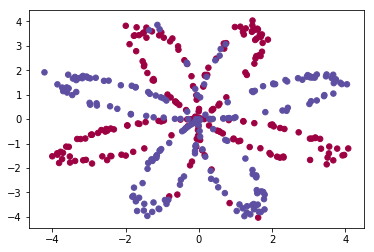

In [55]:
plt.scatter(X[0, :], X[1, :],c=np.squeeze(Y),s=30,cmap=plt.cm.Spectral)

In [76]:
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 1)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [87]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=np.squeeze(y), cmap=plt.cm.Spectral)

### 2. Logistic regression

In [85]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

C:\Users\rakulha\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

Accuracy is 47%


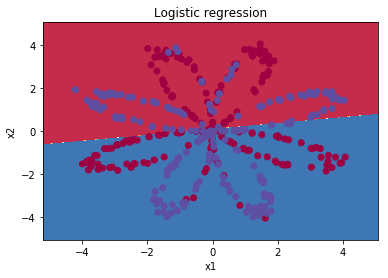

In [111]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title('Logistic regression')

LR_predictions = clf.predict(X.T)
print('Accuracy is %d' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) + "%")

### 3. Decision trees

In [114]:
dt = tree.DecisionTreeClassifier()
dt.fit(X.T,Y.T)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

[Wrong] Accuracy is 36%


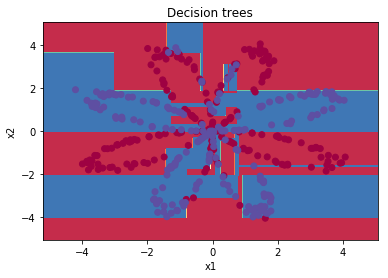

In [158]:
plot_decision_boundary(lambda x: dt.predict(x), X, Y)
plt.title('Decision trees')

DT_predictions = dt.predict(X.T)
print('[Wrong] Accuracy is %d' % float((np.dot(Y, DT_predictions) + np.dot(1 - Y,1 - DT_predictions)) / float(Y.size) * 100)
      + "%")

### 4. Neural network model

In [159]:
def layer_size(X,Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x,n_h,n_y)

In [160]:
layer_size(X,Y)

(2, 4, 1)

In [164]:
def initialize_parameters(n_x,n_h,n_y):
    W1 = np.random.rand(n_h,n_x)
    b1 = np.random.rand(n_h,1)
    W2 = np.random.rand(n_y,n_h)
    b2 = np.random.rand(n_y,1)
    
    assert(W1.shape == (n_h,n_x))
    
    parameters = {
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2
    }
    
    return parameters

In [165]:
initialize_parameters(2,4,1)

{'W1': array([[0.84631092, 0.31327352],
        [0.52454816, 0.44345289],
        [0.22957721, 0.53441391],
        [0.91396202, 0.45720481]]), 'b1': array([[0.43069857],
        [0.93912779],
        [0.77838924],
        [0.71597052]]), 'W2': array([[0.8027575 , 0.09280081, 0.51815255, 0.86502025]]), 'b2': array([[0.82914691]])}

In [166]:
def forward_propagation(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1,X.shape[1]))
    
    cache = {
        'Z1':Z1,
        'A1':A1,
        'Z2':Z2,
        'A2':A2
    }
    
    return A2,cache

In [168]:
def compute_cost(A2,Y,parameters):
    m = X.shape[1]
    
    logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y),np.log(1-A2))
    cost = -np.sum(logprobs) / m
    
    cost = np.squeeze(cost)
    
    assert(isinstance(cost,float))
    
    return cost

In [169]:
def bacward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    A1 = cache['A1']
    A2 = cache['A2']
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1)
    db2 = (1/m) * np.sum(dZ2,axis=1,keepdims=True)
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1,X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW1":dW1,
        "db1":db1,
        "dW2":dW2,
        "db2":db2
    }
    
    return grads

In [172]:
def update_parameters(parameters,grads,learning_rate=0.8):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2
    }
    
    return parameters